In [1]:
!pip install vincenty

  Running setup.py bdist_wheel for vincenty: started
  Running setup.py bdist_wheel for vincenty: finished with status 'done'
  Stored in directory: C:\Users\dabhi\AppData\Local\pip\Cache\wheels\51\33\73\9b9898fb2becf6a3b3082fc863daeade08ccd8900ea9c947c4
Successfully built vincenty


In [2]:
!pip install imbalanced-learn

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

from vincenty import vincenty 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

import time
from datetime import datetime
%autocall 1

Automatic calling is: Smart


#Importing Datasets




In [2]:
spray = pd.read_csv("./data/west_nile/input/spray.csv")
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [3]:
#weather_file = files.upload()
weather = pd.read_csv('./data/west_nile/input/weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
#train_file = files.upload()
train = pd.read_csv('./data/west_nile/input/train.csv')
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
#import Test File
#test_file = files.upload()
test = pd.read_csv('./data/west_nile/input/test.csv')
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


#EDA

In [6]:
def EDA(df):
    null_vals = df.isnull().sum()[df.isnull().sum() > 0] 
    shape = df.shape
    dtypes = df.dtypes
    print('Nulls:', null_vals)
    print('Shape:', shape)
    print('Data Types:', dtypes)

In [7]:
print(EDA(train))
print(EDA(test))
print(EDA(spray))
print(EDA(weather))
#print(EDA(sample))

Nulls: Series([], dtype: int64)
Shape: (10506, 12)
Data Types: Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object
None
Nulls: Series([], dtype: int64)
Shape: (116293, 11)
Data Types: Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object
None
Nulls: Time    584
dtype: int64
Shape: (14835, 4)
Dat

In [8]:
# date is an object an int
def convert_date(df):
    df['Date'] = pd.to_datetime(df['Date'])

In [9]:
convert_date(train)
convert_date(test)
convert_date(weather)

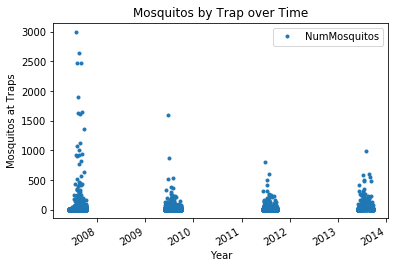

In [10]:
#plotted mosquitos by trap by date
train[['Date', 'Trap', 'NumMosquitos']].groupby(by = ['Date','Trap'])['Date','Trap','NumMosquitos'] \
    .sum().reset_index().sort_values('NumMosquitos', ascending = False).set_index('Date').plot(style = '.')
    
plt.title('Mosquitos by Trap over Time')
plt.xlabel('Year')
plt.ylabel('Mosquitos at Traps');

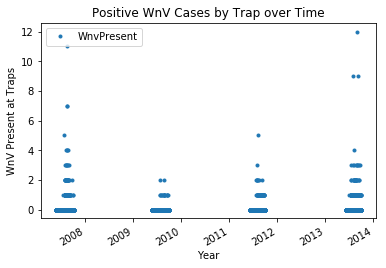

In [11]:
#plotted WNV incidents by trap
train[['Date', 'Trap','WnvPresent']].groupby(by = ['Date','Trap'])['Date','Trap','WnvPresent'] \
    .sum().reset_index().sort_values('WnvPresent', ascending = False).set_index('Date').plot(style = '.')
    
plt.title('Positive WnV Cases by Trap over Time')
plt.xlabel('Year')
plt.ylabel('WnV Present at Traps');

In [12]:
#Create new column for combined Lat and Long
train['LatLong'] = list(zip(train.Latitude, train.Longitude))
test['LatLong'] = list(zip(test['Latitude'], test['Longitude']))

station1 = (41.995, -87.933)
station2 = (41.786, -87.752)
train['Closest_Station'] = [ 1 if vincenty(x,station1) < vincenty(x,station2) else 2 for x in train['LatLong']]
test['Closest_Station'] = [ 1 if vincenty(x,station1) < vincenty(x,station2) else 2 for x in test['LatLong']]

In [13]:
#Merge DataFramne

train_weather = train.merge(weather,how = 'left', left_on = ['Date','Closest_Station'],right_on =['Date','Station'])
test_weather = test.merge(weather,how = 'left', left_on = ['Date','Closest_Station'],right_on =['Date','Station'])

In [14]:
train_weather = train_weather.drop(columns = ['SeaLevel','CodeSum', 'Sunrise', 'Sunset','Depart','Depth','Water1', 'SnowFall', 'Cool', 'Heat','StnPressure', 'AvgSpeed','ResultSpeed','ResultDir','NumMosquitos'])
test_weather =test_weather.drop(columns = ['SeaLevel','CodeSum', 'Sunrise', 'Sunset','Depart','Depth','Water1', 'SnowFall', 'Cool', 'Heat','StnPressure', 'AvgSpeed','ResultSpeed','ResultDir'])

In [15]:
#filling in missing(M) and trace(T)
weather_dataset = train_weather.columns.tolist()

for col in weather_dataset:
    for row in range(train_weather.shape[0]):
        if train_weather.loc[row, col] == 'M' or train_weather.loc[row, col] == '  T':
            train_weather.loc[row, col] = train_weather.loc[row - 1, col]

In [16]:
weather_dataset2 = test_weather.columns.tolist()

for col in weather_dataset2:
    for row in range(test_weather.shape[0]):
        if test_weather.loc[row, col] == 'M' or test_weather.loc[row, col] == '  T':
            test_weather.loc[row, col] = test_weather.loc[row - 1, col]

In [17]:
weather_object_dtypes = ['Tavg', 'WetBulb', 'PrecipTotal']

for col in weather_object_dtypes:
    train_weather[col] = pd.to_numeric(train_weather[col])
    test_weather[col] = pd.to_numeric(test_weather[col])

In [18]:
def mosquito(df):
    #split wnv transmitting mosquito species lines into separate columns
    df['CULEX PIPIENS'] = 0
    df['CULEX RESTUANS'] = 0
    
    for row in range(df.shape[0]):
        if df.loc[row, 'Species'] == 'CULEX PIPIENS/RESTUANS':
            df.loc[row, 'CULEX PIPIENS'] == 1
            df.loc[row, 'CULEX RESTUANS'] == 1
        elif df.loc[row, 'Species'] == 'CULEX PIPIENS':
            df.loc[row, 'CULEX PIPIENS'] == 1
        elif df.loc[row, 'Species'] == 'CULEX RESTUANS':
            df.loc[row, 'CULEX RESTUANS'] == 1
            
    
    df.drop(columns = ['Species'], inplace = True)

In [19]:
#call function
mosquito(train_weather)
mosquito(test_weather)

In [20]:
train_weather.columns

Index(['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'WnvPresent', 'LatLong',
       'Closest_Station', 'Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'PrecipTotal', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype='object')

In [21]:
train_weather = pd.get_dummies(train_weather, columns = ['Block', 'Trap'])
test_weather = pd.get_dummies(test_weather, columns = ['Block', 'Trap'])

In [22]:
# interaction features
train_weather['wet_temp'] = train_weather['PrecipTotal']*train_weather['Tavg']
train_weather['wet_temp_roll'] = train_weather['wet_temp'].rolling(3).mean()
train_weather['wet_temp_roll'].fillna(0, inplace = True)
train_weather['wet_temp_roll_shift14'] = train_weather['wet_temp_roll'].shift(14)
train_weather['wet_temp_roll_shift14'].fillna(0, inplace = True)
train_weather['wet_temp_roll_shift7'] = train_weather['wet_temp_roll'].shift(7)
train_weather['wet_temp_roll_shift7'].fillna(0, inplace = True)


In [23]:
test_weather['wet_temp'] = test_weather['PrecipTotal']*test_weather['Tavg']
test_weather['wet_temp_roll'] = test_weather['wet_temp'].rolling(3).mean()
test_weather['wet_temp_roll'].fillna(0, inplace = True)
test_weather['wet_temp_roll_shift14'] = test_weather['wet_temp_roll'].shift(14)
test_weather['wet_temp_roll_shift14'].fillna(0, inplace = True)
test_weather['wet_temp_roll_shift7'] = test_weather['wet_temp_roll'].shift(7)
test_weather['wet_temp_roll_shift7'].fillna(0, inplace = True)

In [24]:
def date_split(df):
    #breaking week, month, and year into separate columns
    
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

    #drop date column
    df.drop(columns = 'Date', inplace = True)

    #get dummies
    return pd.get_dummies(df, columns = ['Week'])
    return pd.get_dummies(df, columns = ['Month'])
    return pd.get_dummies(df, columns = ['Year'])

In [25]:
#call function
date_split(train_weather)
date_split(test_weather)

,Id,Address,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,LatLong,Closest_Station,Station,...,Week_31,Week_32,Week_33,Week_34,Week_35,Week_36,Week_37,Week_38,Week_39,Week_40
0,1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
5,6,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
7,8,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,"(41.95469, -87.800991)",1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,"(41.994991, -87.769279)",1,1,...,0,0,0,0,0,0,0,0,0,0
9,10,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,"(41.994991, -87.769279)",1,1,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 7 artists>

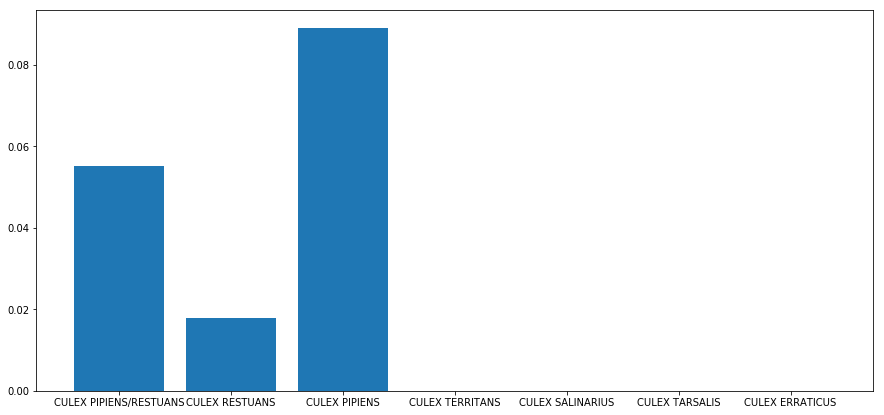

In [26]:
# ADDED BY UDAY
grouped = train.groupby(["Species"])
grouped_percentage = pd.DataFrame()
grouped_percentage["Number of Total Instances"] = train["Species"].value_counts()
grouped_percentage["WnvNotPresent Rate"] = grouped["WnvPresent"].apply(lambda x : x.value_counts()[0]/len(x) )
grouped_percentage["WnvPresent Rate"] = 1 - grouped_percentage["WnvNotPresent Rate"]
grouped_percentage["WnvNotPresent Instances"] = grouped_percentage["Number of Total Instances"] * grouped_percentage["WnvNotPresent Rate"]
grouped_percentage["WnvPresent Instances"] = grouped_percentage["Number of Total Instances"] - grouped_percentage["WnvNotPresent Instances"]

#grouped_percentage

plt.figure(figsize=(15,7))
plt.bar(grouped_percentage.index ,grouped_percentage["WnvPresent Rate"])

In [27]:
train_weather.drop(columns = ['Address','Street', 'AddressNumberAndStreet', 'Latitude', \
                                              'Longitude', 'AddressAccuracy','LatLong'], inplace = True)
test_weather.drop(columns = ['Address','Street', 'AddressNumberAndStreet', 'Latitude', \
                                              'Longitude', 'AddressAccuracy','LatLong'], inplace = True)

In [28]:
# Train-Train-Split on Data Set

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
X = train_weather.drop('WnvPresent', axis =1)
y = train_weather['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [29]:
traindata = X_train.merge(pd.DataFrame(y_train), how = 'left', right_index = True, left_index = True)
train_majority = traindata[traindata['WnvPresent'] == 0]
train_minority = traindata[traindata['WnvPresent'] == 1]
train_minority_upsampled = resample(train_minority, 
                                     replace = True, 
                                     n_samples = train_majority.shape[0],
                                     random_state = 42)

train_data_upsampled = pd.concat([train_majority, train_minority_upsampled])
X_train = train_data_upsampled.drop(columns = 'WnvPresent')
y_train = train_data_upsampled['WnvPresent']

In [30]:
def drop_columns(df1, df2):
    #drop columns in either test/train that are not in the other
    
    df1cols = df1.columns.tolist()
    df2cols = df2.columns.tolist()
    
    notindf1cols = []
    notindf2cols = []
    
    for col in df1cols:
        if col not in df2cols:
            notindf2cols.append(col)
    
    for col in df2cols:
        if col not in df1cols:
            notindf1cols.append(col)
            
    df1.drop(columns = notindf2cols, inplace = True)
    df2.drop(columns = notindf1cols, inplace = True)

In [31]:
drop_columns(test_weather, train_weather)


In [32]:
#checking Class Balance
y_train.value_counts()

1    7466
0    7466
Name: WnvPresent, dtype: int64

In [43]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# rf = RandomForestClassifier()

# rf_pipe = Pipeline([
#     ('ss', ss),
#     ('rf', rf)
# ])

# params = {'rf__n_estimators' : [150,200,250,300],
#           'rf__max_depth' : [None, 2, 3, 4, 5]}

# rf_gs = GridSearchCV(rf_pipe, param_grid=params, cv=5, scoring='roc_auc',n_jobs= 5)
# rf_gs.fit(X_train, y_train)

# best_rf_gs = rf_gs.best_estimator_

# rf_gs_train = best_rf_gs.score(X_train, y_train)
# rf_gs_test = best_rf_gs.score(X_test, y_test)

# print(best_rf_gs)
# print(rf_gs_train)
# print(rf_gs_test)
# print(rf_gsbest_params)

In [ ]:
rf_gs.best_params_

In [44]:
rf = RandomForestClassifier(n_estimators= 100, n_jobs = 5)
rf.fit(X_train,y_train)
rf.score(X_test, y_test)


0.880852683669585

Text(0.5,1,'Random Forest Feature Importances')

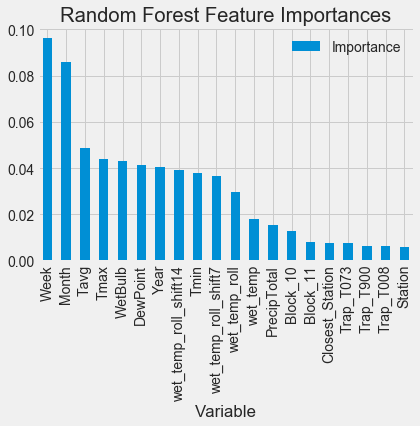

In [45]:
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')



test_names = X.columns.tolist()
rf_importances = pd.DataFrame(sorted(zip(test_names, rf.feature_importances_), reverse = True), columns = ['Variable', 'Importance']).set_index('Variable')
rf_importances.sort_values(by = 'Importance', ascending = False).iloc[:20,:].plot(kind = 'bar')
plt.title('Random Forest Feature Importances')

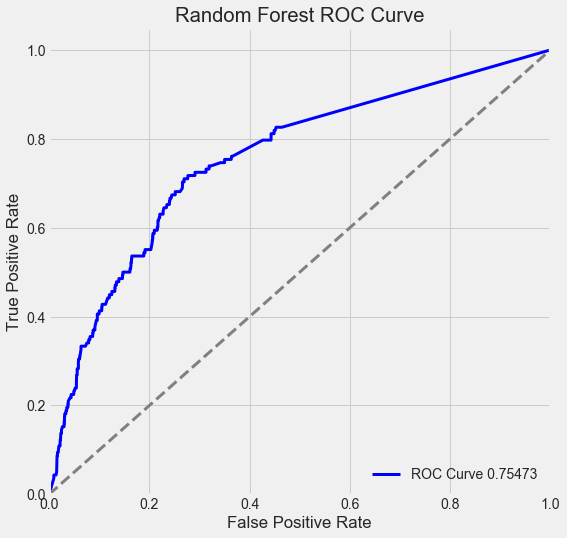

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,lw = 3, color='blue', label='ROC Curve %.5f' % auc)
plt.plot([0,1], [0,1], lw = 3, linestyle ='--', color='grey')
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.savefig('gbc_roc.png')
plt.show()

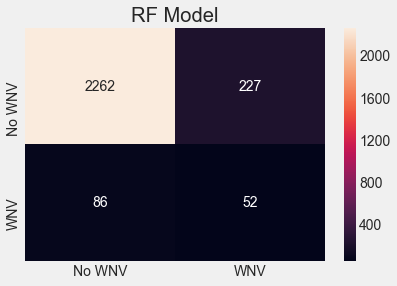

In [63]:
from sklearn.metrics import confusion_matrix
# Create a heatmap confusion matrix - get predictions 
predictions = rf.predict(X_test)

# Create confusion matrix 
classes = ["No WNV", 'WNV']
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=classes)
cm.index = classes

# Plot matrix on heatmap 
sns.heatmap(cm, annot=True, fmt='g')
plt.title('RF Model');


In [47]:
# ADABoost
from sklearn.ensemble import AdaBoostClassifier

adamodel = AdaBoostClassifier(n_estimators=100) 
ada_scores = cross_val_score(adamodel, X_train, y_train, cv=5)
adamodel.fit(X_train,y_train)
adamodel.score(X_train,y_train)
y_preds = adamodel.predict(X_test)
adamodel.score(X_test,y_test)

0.75142748382185

In [48]:
roc_auc_score(y_test,y_preds)

0.7387752487757728

Text(0.5,1,'Ada Boost Feature Importances')

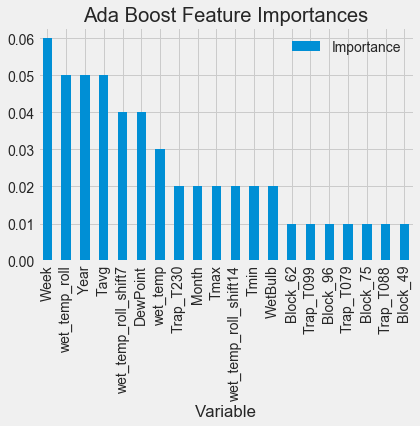

In [52]:
ada_importances = pd.DataFrame(sorted(zip(test_names, adamodel.feature_importances_), reverse = True), columns = ['Variable', 'Importance']).set_index('Variable')
ada_importances.sort_values(by = 'Importance', ascending = False).iloc[:20,:].plot(kind = 'bar')
plt.title('Ada Boost Feature Importances')

In [49]:
adapredicts = pd.DataFrame(y_preds, columns = ['predict'])
#adapredicts.columns
adapredicts['predict'].value_counts()

0    1912
1     715
Name: predict, dtype: int64

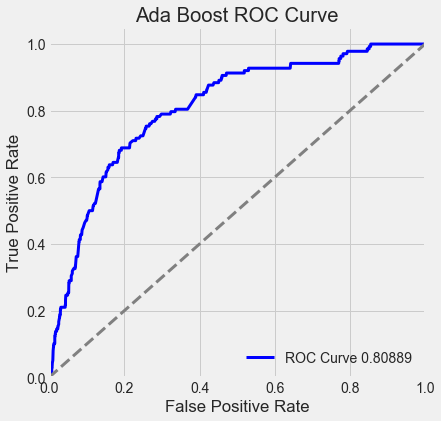

In [65]:
y_pred_proba = adamodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,lw = 3, color='blue', label='ROC Curve %.5f' % auc)
plt.plot([0,1], [0,1], lw = 3, linestyle ='--', color='grey')
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost ROC Curve')
plt.show()

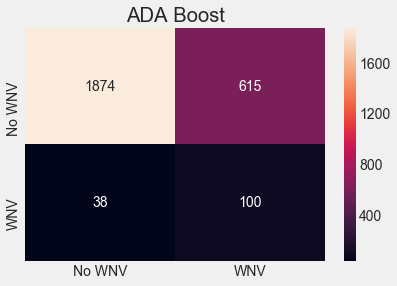

In [50]:
from sklearn.metrics import confusion_matrix
# Create a heatmap confusion matrix - get predictions 
predictions = adamodel.predict(X_test)

# Create confusion matrix 
classes = ["No WNV", 'WNV']
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=classes)
cm.index = classes

# Plot matrix on heatmap 
sns.heatmap(cm, annot=True, fmt='g')
plt.title('ADA Boost');

In [33]:
import xgboost as xgb

In [42]:
xgmodel= xgb.XGBClassifier(max_depth=5, n_estimators=500, n_jobs=-1, learning_rate=1)
eval_set = [(X_train, y_train), (X_test, y_test)]
scores = cross_val_score(xgb.XGBClassifier(), X_train, y_train, cv = 5, n_jobs = -1)
xgmodel.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.844107	validation_1-auc:0.799351
[1]	validation_0-auc:0.87278	validation_1-auc:0.81075
[2]	validation_0-auc:0.881177	validation_1-auc:0.806756
[3]	validation_0-auc:0.886432	validation_1-auc:0.809344
[4]	validation_0-auc:0.893297	validation_1-auc:0.810788
[5]	validation_0-auc:0.897745	validation_1-auc:0.814041
[6]	validation_0-auc:0.908148	validation_1-auc:0.809791
[7]	validation_0-auc:0.914269	validation_1-auc:0.807003
[8]	validation_0-auc:0.918467	validation_1-auc:0.806448
[9]	validation_0-auc:0.925496	validation_1-auc:0.808585
[10]	validation_0-auc:0.929537	validation_1-auc:0.813922
[11]	validation_0-auc:0.931882	validation_1-auc:0.814516
[12]	validation_0-auc:0.934744	validation_1-auc:0.811974
[13]	validation_0-auc:0.936303	validation_1-auc:0.811
[14]	validation_0-auc:0.937367	validation_1-auc:0.812491
[15]	validation_0-auc:0.938759	validation_1-auc:0.813
[16]	validation_0-auc:0.939331	validation_1-auc:0.806953
[17]	validation_0-auc:0.941607	validation_1-auc:0

[144]	validation_0-auc:0.987488	validation_1-auc:0.800655
[145]	validation_0-auc:0.9875	validation_1-auc:0.800528
[146]	validation_0-auc:0.987527	validation_1-auc:0.800199
[147]	validation_0-auc:0.987544	validation_1-auc:0.800176
[148]	validation_0-auc:0.987558	validation_1-auc:0.800316
[149]	validation_0-auc:0.987566	validation_1-auc:0.800004
[150]	validation_0-auc:0.987557	validation_1-auc:0.800519
[151]	validation_0-auc:0.987576	validation_1-auc:0.800036
[152]	validation_0-auc:0.987617	validation_1-auc:0.799541
[153]	validation_0-auc:0.987591	validation_1-auc:0.80026
[154]	validation_0-auc:0.987579	validation_1-auc:0.800374
[155]	validation_0-auc:0.987617	validation_1-auc:0.800691
[156]	validation_0-auc:0.987634	validation_1-auc:0.800394
[157]	validation_0-auc:0.987613	validation_1-auc:0.800583
[158]	validation_0-auc:0.987631	validation_1-auc:0.800484
[159]	validation_0-auc:0.987647	validation_1-auc:0.800866
[160]	validation_0-auc:0.987656	validation_1-auc:0.800703
[161]	validation_

[286]	validation_0-auc:0.988383	validation_1-auc:0.795761
[287]	validation_0-auc:0.988386	validation_1-auc:0.795962
[288]	validation_0-auc:0.988394	validation_1-auc:0.795656
[289]	validation_0-auc:0.988395	validation_1-auc:0.795574
[290]	validation_0-auc:0.988408	validation_1-auc:0.796238
[291]	validation_0-auc:0.988403	validation_1-auc:0.795772
[292]	validation_0-auc:0.988398	validation_1-auc:0.796192
[293]	validation_0-auc:0.988398	validation_1-auc:0.796521
[294]	validation_0-auc:0.988395	validation_1-auc:0.796614
[295]	validation_0-auc:0.988405	validation_1-auc:0.796561
[296]	validation_0-auc:0.988398	validation_1-auc:0.79657
[297]	validation_0-auc:0.988399	validation_1-auc:0.796532
[298]	validation_0-auc:0.988403	validation_1-auc:0.796524
[299]	validation_0-auc:0.988409	validation_1-auc:0.796422
[300]	validation_0-auc:0.988417	validation_1-auc:0.796078
[301]	validation_0-auc:0.988419	validation_1-auc:0.796072
[302]	validation_0-auc:0.98842	validation_1-auc:0.796034
[303]	validation

[428]	validation_0-auc:0.988527	validation_1-auc:0.790806
[429]	validation_0-auc:0.988527	validation_1-auc:0.790858
[430]	validation_0-auc:0.988531	validation_1-auc:0.790896
[431]	validation_0-auc:0.988533	validation_1-auc:0.790765
[432]	validation_0-auc:0.988533	validation_1-auc:0.790744
[433]	validation_0-auc:0.988531	validation_1-auc:0.791021
[434]	validation_0-auc:0.988531	validation_1-auc:0.790855
[435]	validation_0-auc:0.98853	validation_1-auc:0.790765
[436]	validation_0-auc:0.988535	validation_1-auc:0.79091
[437]	validation_0-auc:0.988536	validation_1-auc:0.790867
[438]	validation_0-auc:0.98853	validation_1-auc:0.790893
[439]	validation_0-auc:0.988532	validation_1-auc:0.790695
[440]	validation_0-auc:0.988535	validation_1-auc:0.790608
[441]	validation_0-auc:0.988534	validation_1-auc:0.790759
[442]	validation_0-auc:0.988534	validation_1-auc:0.790855
[443]	validation_0-auc:0.988531	validation_1-auc:0.790951
[444]	validation_0-auc:0.988533	validation_1-auc:0.790995
[445]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [43]:
xgmodel.score(X_test, y_test)

C:\Users\dabhi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8743814236771983

C:\Users\dabhi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


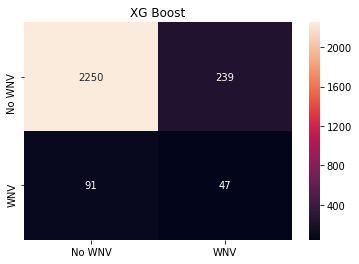

In [49]:
from sklearn.metrics import confusion_matrix
# Create a heatmap confusion matrix - get predictions 
predictions = xgmodel.predict(X_test)

# Create confusion matrix 
classes = ["No WNV", 'WNV']
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=classes)
cm.index = classes

# Plot matrix on heatmap 
sns.heatmap(cm, annot=True, fmt='g')
plt.title('XG Boost');

In [136]:
# XGBoost Classifier (don't run takes forever)

gs_params = {
    'max_depth':[1, 2, 3, 4, 5],
    'n_estimators':range(1, 10, 1),
    'learning_rate':np.logspace(-5,0,5),
    'silent' : [False],
    'booster' : ['gbtree', 'gblinear', 'dart'] 
}

xgb_gs = GridSearchCV(XGBClassifier(), gs_params, cv=5, verbose=1, scoring='roc_auc',n_jobs = 5)

xgb_gs = xgb_gs.fit(X_train, y_train)

best_xgb_gs = xgb_gs.best_estimator_

xgb_gs_train = best_xgb_gs.score(X_train, y_train)
xgb_gs_test = best_xgb_gs.score(X_test, y_test)

print(best_xgb_gs)
print(xgb_gs_train)
print(xgb_gs_test)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:56] src/tree/updater_prune.cc:74: tree pr

[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:27:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.7s


[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:28:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:28:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   21.0s


[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:28:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:28:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:28:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:28:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:28:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   51.5s


[16:28:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:28:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:28:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_dep

[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:28:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:28:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  1.5min


[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:29:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:29:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:29:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth

[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:29:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_d

[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:29:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_de

[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:30:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_

[16:30:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:30:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

[16:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[16:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[16:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[16:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[16:30:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16:30:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[16:30:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_

[16:30:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:30:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_

[16:30:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:30:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[16:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[16:30:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:30:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[16:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_

[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  2.8min


[16:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:10] src/gbm/gbtree.cc:494: drop 

[16:31:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 

[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:13] src/tree/updater_prune.cc:74

[16:31:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:15] src/tree/updater_prun

[16:31:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:17] src/gbm/gbtree.cc:494: drop 

[16:31:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[16:31:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[16:31:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[16:31:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[16:31:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:31:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:31:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:31:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:31:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:31:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1


[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  3.6min


[16:31:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:32] src/gbm/gbtree.cc:494:

[16:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:33] src/gbm/gbtree.cc:494:

[16:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:35] src/gbm/gbtree.cc:494:

[16:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:36] src/gbm/gbtree.cc:494:

[16:31:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:38] src/gbm/gbtree.cc:494:

[16:31:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 

[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:31:41] src/tree/updater_prune.cc:74

[16:31:42] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:42] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:42] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:42] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:42] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:42] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:31:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:43] src/gbm/gbtree.cc:494: drop 

[16:31:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:45] src/gbm/gbtree.cc:494: drop 

[16:31:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:31:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:31:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:47] src/gbm/gbtree.cc:494:

[16:31:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:48] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:48] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:48] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:48] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:48] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:48] src/gbm/gbtree.cc:494:

[16:31:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:50] src/gbm/gbtree.cc:494:

[16:31:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:51] src/gbm/gbtree.cc:494:

[16:31:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:31:52] src/tree/updater_prune

[16:31:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:54] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:54] src/gbm/gbtree.cc:494:

[16:31:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:55] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:55] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:55] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:55] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:55] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:55] src/gbm/gbtree.cc:494:

[16:31:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:56] src/gbm/gbtree.cc:494:

[16:31:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:31:58] src/tree/updater_prune

[16:31:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:31:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:31:59] src/gbm/gbtree.cc:494:

[16:32:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:01] src/gbm/gbtree.cc:494:

[16:32:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:02] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:02] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:02] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:02] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:02] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:02] src/gbm/gbtree.cc:494:

[16:32:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:04] src/gbm/gbtree.cc:494:

[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:05] src/tree/updater

[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:07] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prun

[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 

[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:11] src/gbm/gbtree.cc:494: drop 

[16:32:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:13] src/gbm/gbtree.cc:494: drop 

[16:32:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:14] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:15] src/tree/updater_prune

[16:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:16] src/tree/updater_prune

[16:32:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:18] src/tree/updater

[16:32:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[16:32:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:20] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:20] src/gbm/gbtree.cc:494:

[16:32:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:32:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:32:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:32:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:32:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:32:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 

[16:32:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:31] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 

[16:32:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 

[16:32:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:32:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 

[16:32:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:32:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:38] src/gbm/gbtree.cc:494: drop 

[16:32:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:39] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:39] src/tree/updater_prun

[16:32:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:32:40] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:32:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:41] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:41] src/gbm/gbtree.cc:494: drop 

[16:32:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:43] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:44] src/tree/updater_prun

[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:45] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:46] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:32:46] src/tree/updater_prune.cc:74

[16:32:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:47] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:47] src/gbm/gbtree.cc:494:

[16:32:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:49] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:49] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:49] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:49] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:49] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:49] src/tree/updater_prune

[16:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:50] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:50] src/gbm/gbtree.cc:494:

[16:32:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:51] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:32:51] src/gbm/gbtree.cc:494:

[16:32:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:52] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:53] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:53] src/gbm/gbtree.cc:494:

[16:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:54] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:54] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:54] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:54] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:55] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:55] src/gbm/gbtree.cc:494:

[16:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:32:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:32:56] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:56] src/gbm/gbtree.cc:494:

[16:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:57] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:57] src/gbm/gbtree.cc:494:

[16:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:59] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:32:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:32:59] src/gbm/gbtree.cc:494:

[16:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:01] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:01] src/gbm/gbtree.cc:494:

[16:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:03] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:03] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:03] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:03] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:33:03] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:03] src/gbm/gbtree.cc:494:

[16:33:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:33:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:04] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:33:04] src/gbm/gbtree.cc:494:

[16:33:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:06] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:33:06] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:33:06] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:33:06] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:06] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:33:06] src/gbm/gbtree.cc:494:

[16:33:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:33:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:33:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:33:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:33:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:08] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:33:08] src/gbm/gbtree.cc:494:

[16:33:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:09] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:09] src/gbm/gbtree.cc:494: drop 

[16:33:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:10] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:10] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:10] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:10] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:10] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:10] src/gbm/gbtree.cc:494: drop 

[16:33:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:11] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned

[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/gbm/gbtree.cc:494: drop 

[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  5.3min


[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:33:12] src/gbm/gbtree.cc:494: drop 

[16:33:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:13] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:15] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:15] src/gbm/gbtree.cc:494: drop 

[16:33:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:16] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:16] src/gbm/gbtree.cc:494: drop 

[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/tree/updater_prun

[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:17] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:33:18] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned

[16:33:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:19] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:19] src/tree/updater_prune

[16:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:33:21] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:21] src/tree/updater_prune

[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:22] src/tree/updater

[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:23] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:23] src/tree/updater_

[16:33:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:33:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:24] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:25] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:33:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[16:33:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:33:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[16:33:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:26] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 

[16:33:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[16:33:27] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[16:33:28] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16:33:28] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16:33:28] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[16:33:28] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 

[16:33:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:33:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:33:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:33:29] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 

[16:33:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[16:33:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[16:33:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:33:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[16:33:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[16:33:30] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 

[16:33:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:33:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:32] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 

[16:33:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:33:33] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:33:34] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:33:34] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:33:34] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:33:34] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 

[16:33:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[16:33:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:33:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[16:33:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:33:35] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 

[16:33:36] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[16:33:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[16:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:33:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:33:37] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 

[16:33:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[16:33:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:33:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[16:33:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[16:33:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:38] src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[16:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 

[Parallel(n_jobs=5)]: Done 3375 out of 3375 | elapsed:  5.7min finished


[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16:33:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:33:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_

/Users/jon/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/jon/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
# Gridsearch on logistic regression model above
lr_params = {'penalty':['l1', 'l2'], 
             'C': np.logspace(-5, 2, 10)}
gslr = GridSearchCV(LogisticRegression(), param_grid = lr_params)
gslr.fit(X_train, y_train)

# Results 
gslr.best_score_, gslr.best_params_

(0.7448432895794267, {'C': 100.0, 'penalty': 'l2'})

In [54]:
gslr.score(X_test,y_test)

0.6623524933384088

In [55]:
lrpredict = gslr.predict(X_test)
roc_auc_score(y_test, lrpredict)

0.657545373556693

Text(0.5,1,'Logistic Regression Coefficients')

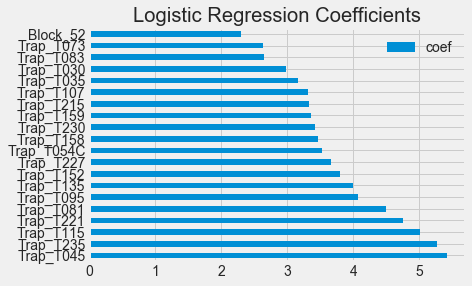

In [58]:
coefs = pd.DataFrame(gslr.best_estimator_.coef_[0], index = X.columns, columns = ['coef'])
coefs.sort_values(by='coef', ascending = False, inplace=True)
coefs.head(20).plot(kind = 'barh')
plt.title('Logistic Regression Coefficients')

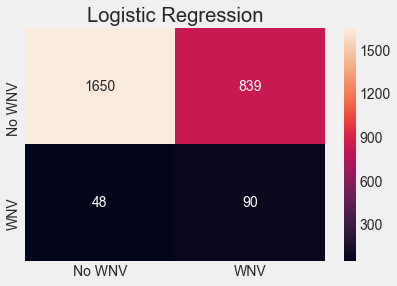

In [66]:
# Create a heatmap confusion matrix - get predictions 
predictions = gslr.predict(X_test)

# Create confusion matrix 
classes = ["No WNV", 'WNV']
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=classes)
cm.index = classes

# Plot matrix on heatmap 
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Logistic Regression');

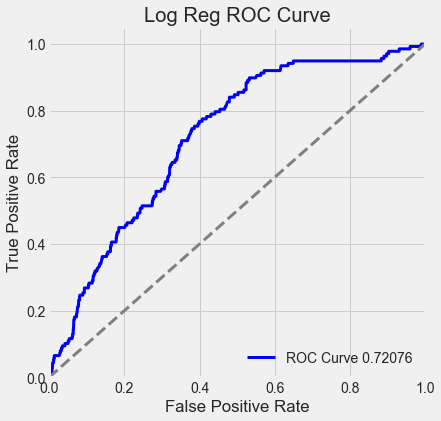

In [67]:
y_pred_proba = gslr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,lw = 3, color='blue', label='ROC Curve %.5f' % auc)
plt.plot([0,1], [0,1], lw = 3, linestyle ='--', color='grey')
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log Reg ROC Curve')
plt.show()

In [148]:
# Executive Summary of Models

print('GridSearchCV across Random Forest:')
print(f"Best Parameters = {rf_gs.best_params_}")
print(f"Best CV Score = {rf_gs.best_score_}")
print(f"Train Score = {rf_gs_train}")
print(f"Test Score = {rf_gs_test}")
print()
print('GridSearchCV across XGBoost:')
print(f"Best Parameters = {xgb_gs.best_params_}")
print(f"Best CV Score = {xgb_gs.best_score_}")
print(f"Train Score = {xgb_gs_train}")
print(f"Test Score = {xgb_gs_test}")
print()
print('GridSearchCV across BalancedBaggingClassifier:')
print(f"Best Parameters = {bbc_gs.best_params_}")
print(f"Best CV Score = {bbc_gs.best_score_}")
print(f"Train Score = {bbc_train}")
print(f"Test Score = {bbc_test}")



GridSearchCV across Random Forest:
Best Parameters = {'rf__max_depth': None, 'rf__n_estimators': 300}
Best CV Score = 0.9784085335688305
Train Score = 0.9608223948566836
Test Score = 0.8800913589645984

GridSearchCV across XGBoost:
Best Parameters = {'booster': 'gbtree', 'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 9, 'silent': False}
Best CV Score = 0.9044532207545108
Train Score = 0.8529332976158586
Test Score = 0.7624666920441568

GridSearchCV across BalancedBaggingClassifier:


NameError: name 'bbc_gs' is not defined

In [129]:
predict = adamodel.predict(test_weather)

In [134]:


test['WnvPresent'] = predict
test[['Id','WnvPresent']].to_csv('submission.csv',index = False)

In [135]:
test[['Id','WnvPresent']].to_csv('submission.csv',index = False)